In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import fastpli.model.solver
import fastpli.model.sandbox as sandbox

In [96]:

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
def plot_fiber_bundles(fbs, colors,ax):
    #fig = plt.figure()
    #ax = fig.add_subplot(1, 2, 1, projection='3d')
    for fb, c in zip(fbs, colors):
        for f in fb:
            ax.plot(f[:,0],f[:,1],f[:,2], c)
    set_3d_axes_equal(ax)

Crossing Fibers

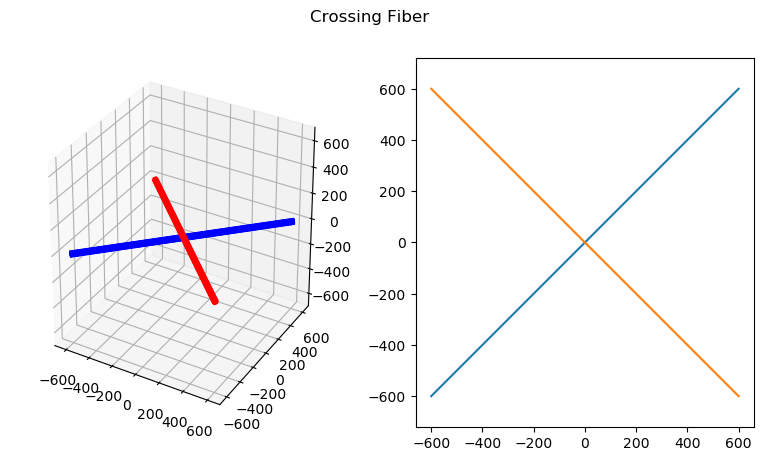

In [97]:

#Crossing Fibers
fb_0 = np.array([[-600, -600, 0], [-300, -300, 0], [0,0,0], [300, 300,0], [600, 600, 0]])
fb_1 = np.array([[-600, 600, 0], [-300, 300, 0], [0,0,0], [300, -300,0], [600, -600, 0]])

#fb_0 = np.array([[-2000, -2000, 0], [-1000, -1000, 0], [0,0,0], [1000, 1000,0], [2000, 2000, 0]])
#fb_1 = np.array([[-2000, 2000, 0], [-1000, 1000, 0], [0,0,0], [1000, -1000,0], [2000, -2000, 0]])

#population = fastpli.model.sandbox.seeds.triangular_circle(100, 19)
#fiber_radii = np.random.uniform(2.0, 2.0, population.shape[0])
population = fastpli.model.sandbox.seeds.triangular_circle(20, 6)
fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])
ffb_0 = fastpli.model.sandbox.build.bundle(fb_0, population, fiber_radii)
ffb_1 = fastpli.model.sandbox.build.bundle(fb_1, population, fiber_radii)

fiber_bundles = [ffb_0, ffb_1]
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_fiber_bundles(fiber_bundles, ['b', 'r'], ax)

ax = fig.add_subplot(1, 2, 2)
#fig, ax = plt.subplots(1,1)
ax.plot(fb_0[:,0], fb_0[:,1])
ax.plot(fb_1[:,0], fb_1[:,1])
ax.axis('equal')
fig.suptitle('Crossing Fiber')
plt.show()

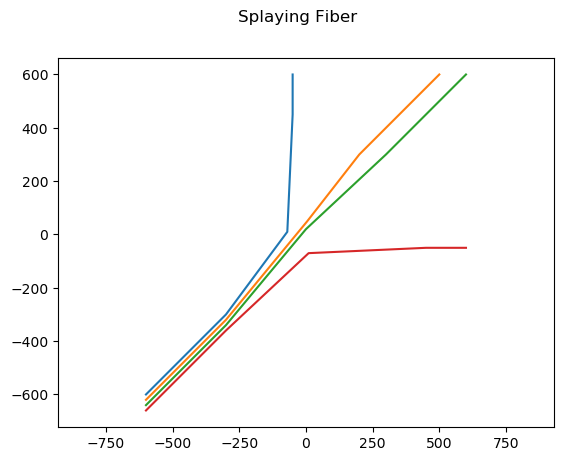

In [98]:

#Splaying fibers
fb_0 = np.array([[-600, -600, 10], [-300, -300, 10], [-70,10,10], [-50, 450,10], [-50, 600, 10]])
fb_1 = np.array([[-600, -620, 20], [-300, -320, 20], [5,50,20], [200, 300,20], [500, 600, 20]])
fb_2 = np.array([[-600, -640, 30], [-300, -340, 30], [0,20,30], [300, 300,30], [600, 600, 30]])
fb_3 = np.array([[-600, -660, 40], [-300, -360, 40], [10,-70,40], [450, -50,40], [600, -50, 40]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#fig, ax = plt.subplots(1,1)
ax.plot(fb_0[:,0], fb_0[:,1])
ax.plot(fb_1[:,0], fb_1[:,1])
ax.plot(fb_2[:,0], fb_2[:,1])
ax.plot(fb_3[:,0], fb_3[:,1])
ax.axis('equal')
fig.suptitle('Splaying Fiber')
plt.show()

population = fastpli.model.sandbox.seeds.triangular_circle(100, 19)
fiber_radii = np.random.uniform(2.0, 2.0, population.shape[0])
ffb_0 = fastpli.model.sandbox.build.bundle(fb_0, population, fiber_radii)
ffb_1 = fastpli.model.sandbox.build.bundle(fb_1, population, fiber_radii)
ffb_2 = fastpli.model.sandbox.build.bundle(fb_2, population, fiber_radii)
ffb_3 = fastpli.model.sandbox.build.bundle(fb_3, population, fiber_radii)

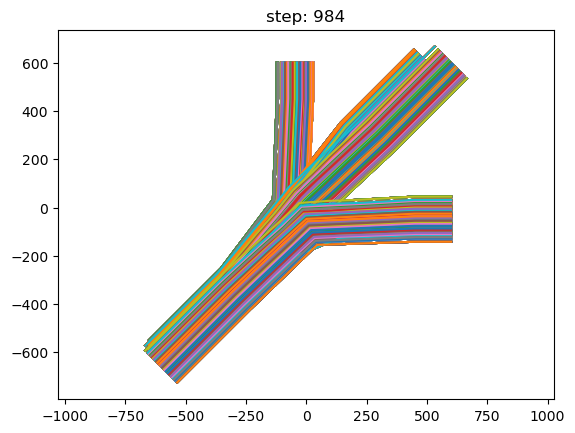

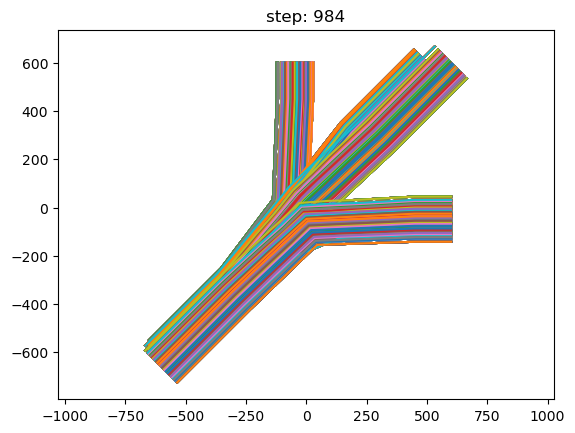

In [99]:

from IPython import display
fig, ax = plt.subplots(1,1)

solver = fastpli.model.solver.Solver()
#solver.fiber_bundles = [ffb_0, ffb_1]
solver.fiber_bundles = [ffb_0, ffb_1, ffb_2, ffb_3]
solver.apply_boundary_conditions()
solver.obj_min_radius =  150  #100 - 966 #1000 -966 #10 -252
solver.obj_mean_length = 150 #4243

solver.omp_num_threads = 2

for i in range(1000):
    solved = solver.step()
    if i % 24 == 0:
        for fb in solver.fiber_bundles:
            for f in fb:
                # show only the middle section of fibers
                if np.any(f[:,2] > 50) or np.any(f[:,2] < -50):
                    plt.plot(f[:,0], f[:,1])
        ax.axis('equal')
        ax.set_title(f'step: {i}')
        display.clear_output(wait=True)
        display.display(fig)
    if solved:
        break